In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras_facenet import FaceNet
from dnn_face_detection import detect_face
from sklearn.metrics.pairwise import cosine_similarity


In [20]:
img1=cv2.imread("/home/mukesh/AI_learning_info/mukesh.jpg")
img2=cv2.imread("/home/mukesh/AI_learning_info/img.jpg")

In [6]:
def plot_img(img):
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

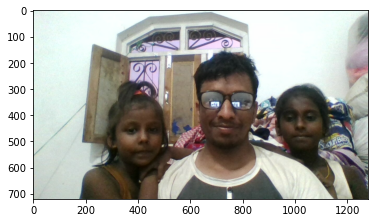

In [21]:
plot_img(img1)

In [8]:
def face_detection(img):
    faces = detect_face(img)
    print(faces)
    for bounding_box in faces:

        x = int(bounding_box[0])
        y = int(bounding_box[1])
        x2 = int(bounding_box[2])
        y2 = int(bounding_box[3])
        print(x,y,x2,y2)
        crop_face = img[y:y2,x:x2]
        crop_face = cv2.resize(crop_face,(160,160))
        return crop_face

[[ 940.98  331.27 1117.33  529.76]
 [ 318.07  359.98  497.84  599.19]
 [ 634.56  242.11  853.29  519.51]]
940 331 1117 529
[[573.43  79.6  841.21 443.25]]
573 79 841 443


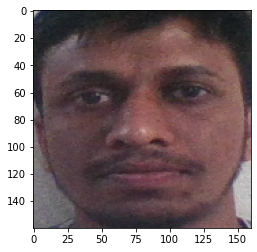

In [22]:
face_dec=face_detection(img1)
face_dec2=face_detection(img2)
plot_img(face_dec)
plot_img(face_dec2)

In [13]:
embedder=FaceNet()

2022-11-18 15:11:43.802928: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mukesh/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-11-18 15:11:43.808406: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-18 15:11:43.826686: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mukesh-Inspiron-5468): /proc/driver/nvidia/version does not exist
2022-11-18 15:11:43.939060: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
embedding1=embedder.embeddings(np.expand_dims(face_dec,axis=0))
embedding2=embedder.embeddings(np.expand_dims(face_dec2,axis=0))

1/1 [==============================] - 0s 256ms/step


In [24]:
similarity_score=cosine_similarity(embedding1,embedding2)
similarity_score


array([[0.38600957]], dtype=float32)